In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [0]:
data = pd.read_csv('ex2data1.txt',header=None)

In [3]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [0]:
data_n = data.values
m = len(data_n[:,-1])
X = data_n[:,0:2].reshape(m,2)
y = data_n[:,-1].reshape(m,1)


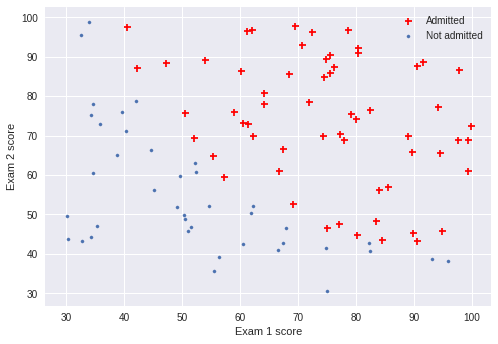

In [11]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [15]:
#testing sigmoid
print(sigmoid(0))

0.5


In [0]:
def costFunction(X,y,theta):
  m = len(y)
  predictions = sigmoid(np.dot(X,theta))
  error = (-y * np.log(predictions) - (1-y) * np.log(1 - predictions))
  cost = (1/m) * sum(error)
  
  grad = (1/m) * np.dot(X.transpose(),(predictions - y))
  
  return cost[0], grad

In [0]:
def featureNormalize(X):
  mean = np.mean(X,axis=0)
  std = np.std(X,axis=0)
  X_norm = (X-mean)/std
  
  return X_norm , mean , std



In [36]:
cost , grad = costFunction(X,y,initial_theta)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [0]:
data_n = data.values
m = len(data_n[:,-1])
X = data_n[:,0:2].reshape(m,2)
X , X2_mean , X2_std = featureNormalize(X)

y = data_n[:,-1].reshape(m,1)


m , n = X.shape[0] , X.shape[1]
X = np.append(np.ones((m,1)),X,axis=1)
y = y.reshape(m,1)
initial_theta = np.zeros((n+1,1))


In [0]:
def gradientDescent(X,y,theta,alpha,num_iters):
  m = len(y)
  J_history = []
  for i in range(num_iters):
    cost,grad = costFunction(X,y,theta)
    theta -= (alpha * grad)
    J_history.append(cost)
    
  return theta, J_history

In [0]:
alpha = 1
num_iters = 400

In [0]:
theta , J_history = gradientDescent(X,y,initial_theta,alpha,num_iters)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

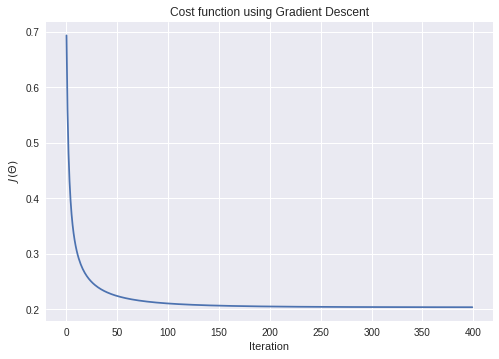

In [44]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [47]:
print(J_history[-1])

0.20360044248226664


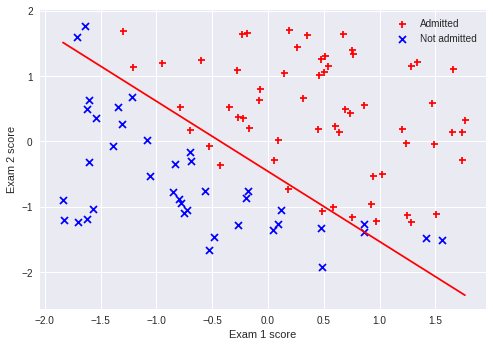

In [48]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [52]:
x_test = np.array([45,85])
x_test = (x_test - X2_mean)/X2_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7677628875792492


In [0]:
def classifierPredict(theta,X):
    predictions = X.dot(theta)
    
    return predictions>0

In [54]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
